In [51]:
# Import Dependecies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import string
import seaborn as sns
from scipy.stats import linregress


# Import the Aviation Stack API key
from mykeys import aviation_stack

# Import the OpenWeatherMap API key
from mykeys import weatherapi_key

In [52]:
# load aviation data
aviation_data = pd.read_csv("./airline_data.csv")
aviation_data.head()

,flight_date,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,12/2023,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,12/2023,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,12/2023,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,12/2023,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,12/2023,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [53]:
print(aviation_data["flight_date"].unique())

['12/2023' '11/2023' '10/2023' '09/2023' '08/2023' '07/2023' '06/2023'
 '05/2023' '04/2023' '03/2023' '02/2023' '01/2023' '12/2022' '11/2022'
 '10/2022' '09/2022' '08/2022' '07/2022' '06/2022' '05/2022' '04/2022'
 '03/2022' '02/2022' '01/2022' '12/2021' '11/2021']


In [54]:
# Convert the DataFrame to a list of dictionaries
flights = aviation_data.to_dict(orient='records')

# Initialize an empty list for filtered flights
filtered_flights = []

# Loop through each flight in the list
for flight in flights:
    flight_date = str(flight.get("flight_date", ""))  # Ensure the date is a string (use .get to handle missing keys)
    
    # Check if the date starts with '11' or '12' (representing November or December)
    if flight_date.startswith("11") or flight_date.startswith("12"):
        filtered_flights.append(flight)

# Output the number of filtered flights
print(len(filtered_flights))


11445


In [55]:
formatted_flights = []

random_flights = random.sample(filtered_flights, min(200, len(filtered_flights)))

print(f"Number of randomly selected flights: {len(random_flights)}")

Number of randomly selected flights: 200


In [56]:
for flight in random_flights[:5]:
        print(flight["flight_date"])

11/2021
11/2022
12/2023
12/2023
11/2022


In [57]:
for flight in random_flights:
    airline_name = flight["carrier_name"]
    arrival_airport = flight["airport"]
    date = flight["flight_date"]
    airline_delay = flight["carrier_delay"]
    weather_delay = flight["weather_delay"]
    nas_delay = flight["nas_delay"]
    security_delay = flight["security_delay"]
    late_aircraft_delay = flight["late_aircraft_delay"]
    count_airline_delay = flight["carrier_ct"]
    count_weather_delay = flight["weather_ct"]
    count_nas_delay = flight["nas_ct"]
    count_security_delay = flight["security_ct"]
    count_late_aircraft_delay = flight["late_aircraft_ct"]

    # NAS is the National Aviation System
    formatted_flights.append({
        "Date": date,
        "Airline Name": airline_name,
        "Arrival Airport": arrival_airport,
        "Delay due to Airline in Mins": airline_delay,
        "Delay due to Weather in Mins": weather_delay,
        "Delay due to NAS in Mins": nas_delay,
        "Delay due to Security in Mins": security_delay,
        "Delay due to Late Aircraft in Mins": late_aircraft_delay,
        "# of Airline Delays": count_airline_delay,
        "# of Weather Delays": count_weather_delay,
        "# of NAS Delays": count_nas_delay,
        "# of Security Delays": count_security_delay,
        "# of Late Aircraft Delays": count_late_aircraft_delay
    })

In [58]:
flight_data_df = pd.DataFrame(formatted_flights)

print(flight_data_df)

        Date               Airline Name Arrival Airport  \
0    11/2021         Mesa Airlines Inc.             BWI   
1    11/2022            JetBlue Airways             PIT   
2    12/2023  American Airlines Network             RSW   
3    12/2023    Alaska Airlines Network             IND   
4    11/2022  American Airlines Network             BNA   
..       ...                        ...             ...   
195  11/2023  American Airlines Network             HNL   
196  11/2022                  Envoy Air             CID   
197  12/2021          PSA Airlines Inc.             EWN   
198  12/2023            Spirit Airlines             TPA   
199  12/2021          Endeavor Air Inc.             LSE   

     Delay due to Airline in Mins  Delay due to Weather in Mins  \
0                            47.0                           0.0   
1                          1364.0                           0.0   
2                           985.0                          77.0   
3                      

In [59]:
flight_data_df.to_csv("flights.csv", index=True, mode='w')

flight_data_df = pd.read_csv("flights.csv", index_col=0)

flight_data_df.head()

,Date,Airline Name,Arrival Airport,Delay due to Airline in Mins,Delay due to Weather in Mins,Delay due to NAS in Mins,Delay due to Security in Mins,Delay due to Late Aircraft in Mins,# of Airline Delays,# of Weather Delays,# of NAS Delays,# of Security Delays,# of Late Aircraft Delays
0,11/2021,Mesa Airlines Inc.,BWI,47.0,0.0,0.0,0.0,0.0,2.00,0.00,0.00,0.00,0.00
1,11/2022,JetBlue Airways,PIT,1364.0,0.0,81.0,0.0,396.0,17.57,0.00,2.85,0.00,7.58
2,12/2023,American Airlines Network,RSW,985.0,77.0,1570.0,0.0,2219.0,22.17,1.20,39.44,0.00,29.19
3,12/2023,Alaska Airlines Network,IND,0.0,0.0,23.0,0.0,158.0,0.00,0.00,0.67,0.00,5.33
4,11/2022,American Airlines Network,BNA,3258.0,91.0,1051.0,3.0,5055.0,55.00,2.47,30.50,0.06,59.97


In [60]:
selected_columns = flight_data_df[["Date", "Airline Name", "Delay due to Weather in Mins"]]

# Display the selected columns
print(selected_columns)

        Date               Airline Name  Delay due to Weather in Mins
0    11/2021         Mesa Airlines Inc.                           0.0
1    11/2022            JetBlue Airways                           0.0
2    12/2023  American Airlines Network                          77.0
3    12/2023    Alaska Airlines Network                           0.0
4    11/2022  American Airlines Network                          91.0
..       ...                        ...                           ...
195  11/2023  American Airlines Network                           0.0
196  11/2022                  Envoy Air                          37.0
197  12/2021          PSA Airlines Inc.                         545.0
198  12/2023            Spirit Airlines                          49.0
199  12/2021          Endeavor Air Inc.                           0.0

[200 rows x 3 columns]


In [61]:

# Change the 'Date' column to month and year
selected_columns["Date"] = pd.to_datetime(selected_columns["Date"])

# Extract Month and Year from the 'Date' column
selected_columns["Month"] = selected_columns["Date"].dt.month
selected_columns["Year"] = selected_columns["Date"].dt.year

# Drop the original 'Date' column 
selected_columns = selected_columns.drop(columns=["Date"])

# Display the updated DataFrame
print(selected_columns)


                  Airline Name  Delay due to Weather in Mins  Month  Year
0           Mesa Airlines Inc.                           0.0     11  2021
1              JetBlue Airways                           0.0     11  2022
2    American Airlines Network                          77.0     12  2023
3      Alaska Airlines Network                           0.0     12  2023
4    American Airlines Network                          91.0     11  2022
..                         ...                           ...    ...   ...
195  American Airlines Network                           0.0     11  2023
196                  Envoy Air                          37.0     11  2022
197          PSA Airlines Inc.                         545.0     12  2021
198            Spirit Airlines                          49.0     12  2023
199          Endeavor Air Inc.                           0.0     12  2021

[200 rows x 4 columns]


C:\Users\uonuc\AppData\Local\Temp\ipykernel_10944\2074707713.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  selected_columns["Date"] = pd.to_datetime(selected_columns["Date"])
C:\Users\uonuc\AppData\Local\Temp\ipykernel_10944\2074707713.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns["Date"] = pd.to_datetime(selected_columns["Date"])
C:\Users\uonuc\AppData\Local\Temp\ipykernel_10944\2074707713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [69]:

# Group by 'Airline Name', 'Month', and 'Year' and sum delay due to weather
aggregated_data = selected_columns.groupby(["Airline Name", "Month", "Year"]).sum({"Delay due to Weather in Mins": "sum"})
     
# Put aggregated data into a dataframe
pivoted_data = aggregated_data.pivot_table(index=["Airline Name"], columns=["Year", "Month"], values="Delay due to Weather in Mins", aggfunc="sum")
pivoted_data = pivoted_data.fillna("0.0")   
# Display the pivoted DataFrame
print(pivoted_data)


Year                                         2021           2022           \
Month                                          11      12     11       12   
Airline Name                                                                
Air Wisconsin Airlines Corp                   0.0     0.0    0.0      0.0   
Alaska Airlines Network                       0.0    10.0    0.0     57.0   
Allegiant Air                               352.0     0.0  140.0    536.0   
American Airlines Network                     2.0     0.0  164.0    960.0   
Commutair Aka Champlain Enterprises, Inc.     0.0   125.0    0.0      0.0   
CommuteAir LLC dba CommuteAir                 0.0     0.0   32.0      0.0   
Delta Air Lines Network                     454.0   598.0    0.0   1056.0   
Endeavor Air Inc.                             0.0  4023.0    0.0    644.0   
Envoy Air                                   207.0   843.0  374.0    571.0   
Frontier Airlines                             0.0     0.0    0.0     10.0   

In [128]:
# Convert Delay from minutes to hours
pivoted_data = pivoted_data.apply(pd.to_numeric, errors='coerce')
pivoted_data = pivoted_data / 60
print(pivoted_data)

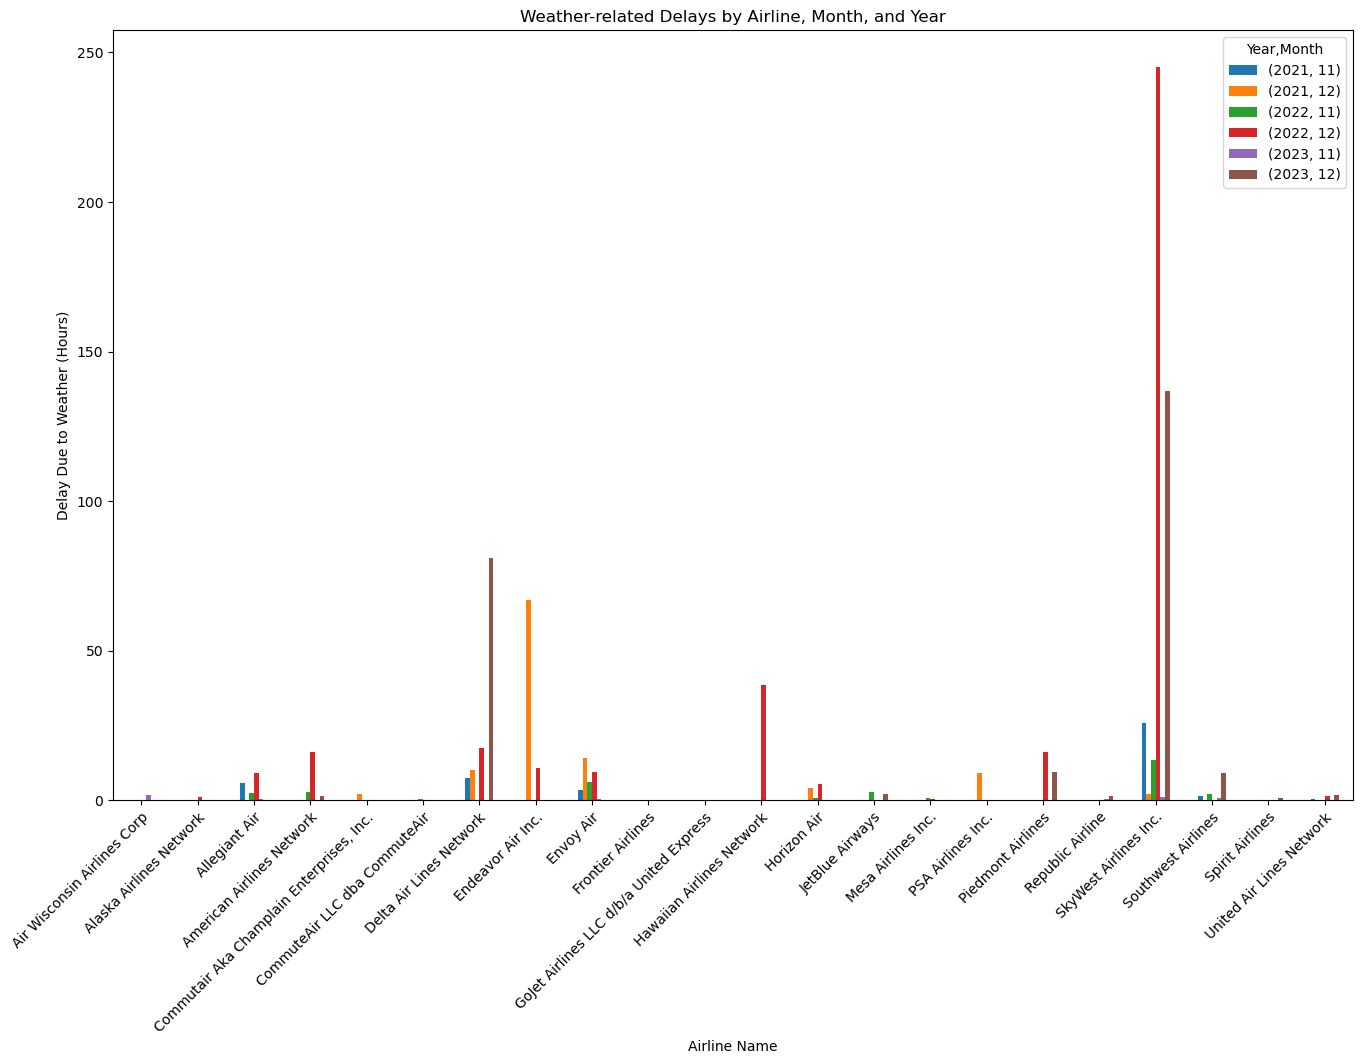

In [131]:
# Create a bar plot for the pivoted data
flight_data_plot = pivoted_data.plot(kind="bar", figsize=(16, 10))

# Set labels for the plot
plt.title('Weather-related Delays by Airline, Month, and Year', fontsize=12)
flight_data_plot.set_xlabel("Airline Name")
flight_data_plot.set_ylabel("Delay Due to Weather (Hours)")

# Set custom x-tick labels (rotation and alignment)
xticklabels = pivoted_data.index
flight_data_plot.set_xticklabels(xticklabels, rotation=45, rotation_mode="anchor", ha="right")

# Show the plot
plt.show()

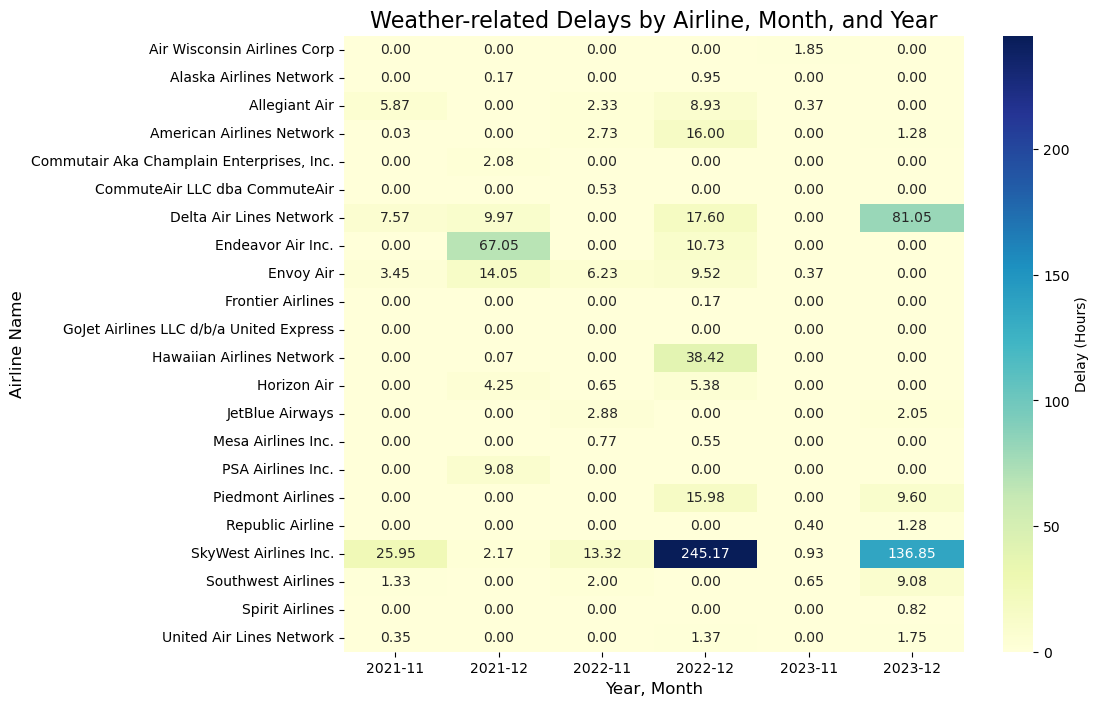

In [74]:
# Heatmap to visualize delays by month and year across airlines
plt.figure(figsize=(10, 8))
sns.heatmap(pivoted_data, annot=True, cmap='YlGnBu', fmt='.2f', cbar_kws={'label': 'Delay (Hours)'})

# Set labels and title
plt.title('Weather-related Delays by Airline, Month, and Year', fontsize=16)
plt.xlabel('Year, Month', fontsize=12)
plt.ylabel('Airline Name', fontsize=12)

# Show plot
plt.show()

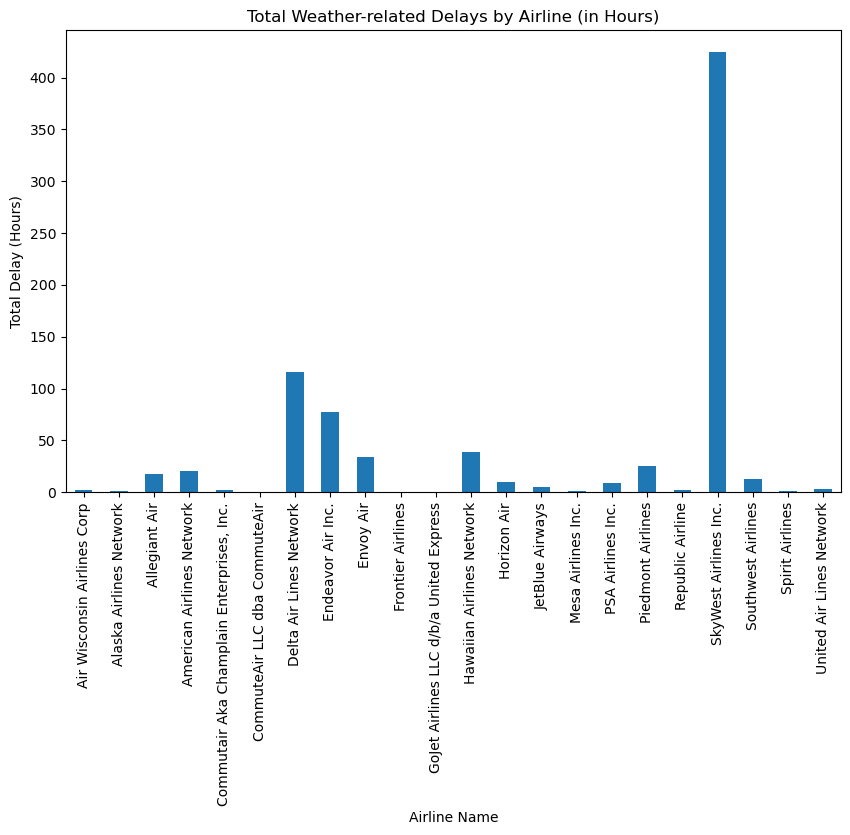

In [81]:

# Group by Airline Name and sum delays, then convert to hours
total_delay_by_airline = aggregated_data.groupby('Airline Name')['Delay due to Weather in Mins'].sum() / 60  # convert to hours

# Plot the bar chart for total weather-related delays by airline
total_delay_by_airline.plot(kind='bar', figsize=(10, 6))
plt.title('Total Weather-related Delays by Airline (in Hours)')
plt.xlabel('Airline Name')
plt.ylabel('Total Delay (Hours)')

plt.show()

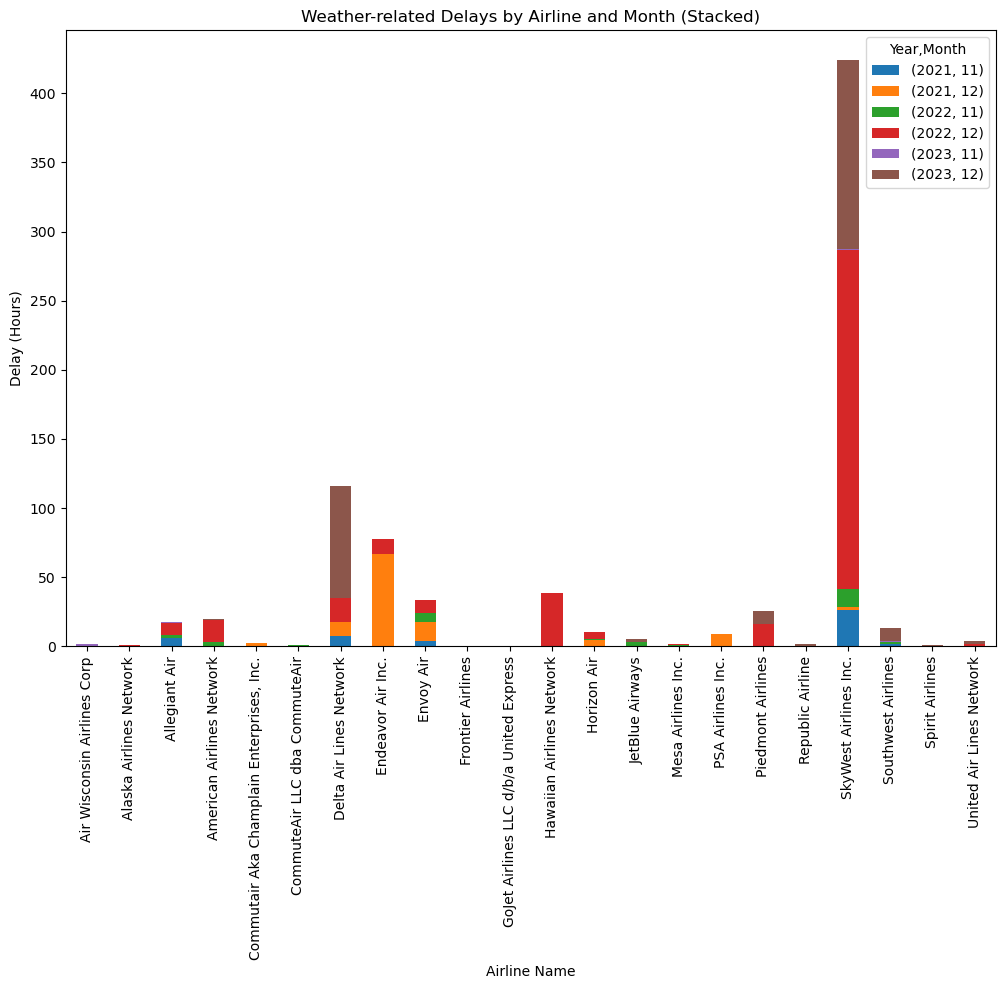

In [77]:
pivoted_data.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Weather-related Delays by Airline and Month (Stacked)')
plt.xlabel('Airline Name')
plt.ylabel('Delay (Hours)')
plt.show()

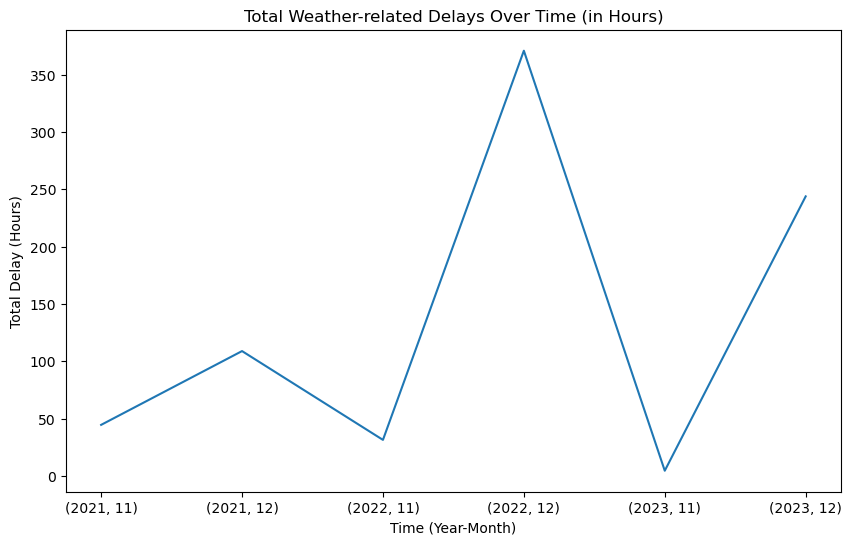

In [79]:
delay_by_month = aggregated_data.groupby(['Year', 'Month']).sum()['Delay due to Weather in Mins'] / 60  # convert to hours

# Plot the line chart for weather-related delays over time
delay_by_month.plot(kind='line', figsize=(10, 6))
plt.title('Total Weather-related Delays Over Time (in Hours)')
plt.xlabel('Time (Year-Month)')
plt.ylabel('Total Delay (Hours)')
plt.show()

In [110]:
airline_data = pd.read_csv('airline_data.csv')

# Ensure that 'arr_flights' is treated as a string column, and handle missing values
#airline_data['arr_flights'] = airline_data['arr_flights'].astype(str).str.strip().str.lower()

# Filter the data for December 2023 and arrival flights
december_2023_arrivals = airline_data[
    (airline_data['month'] == 12) & 
    (airline_data['year']) & 
    (airline_data['carrier_name'] == 'Delta Air Lines Network') &
    (airline_data['airport_name'] == 'Philadelphia, PA: Philadelphia International')
]

# Check if any data was selected
print(december_2023_arrivals.head())

# Group by 'arr_flights' and calculate the count of flights for each 'arr_flights' category
arrival_counts = december_2023_arrivals.groupby('arr_flights').size()

# Output the total number of arrival flights by 'arr_flights' category for December 2023
print("Arrival Flight Counts:")
print(arrival_counts)

# If you want to sum up 'weather_delay' for each 'arr_flights' group:
weather_delay_by_arrival = december_2023_arrivals.groupby('arr_flights')['weather_delay'].sum()

# Output the sum of weather delays for each arrival category
print("\nTotal Weather Delay by Arrival Type:")
print(weather_delay_by_arrival)

      flight_date  year  month carrier             carrier_name airport  \
563       12/2023  2023     12      DL  Delta Air Lines Network     PHL   
46106     12/2021  2021     12      DL  Delta Air Lines Network     PHL   

                                       airport_name  arr_flights  arr_del15  \
563    Philadelphia, PA: Philadelphia International        473.0       40.0   
46106  Philadelphia, PA: Philadelphia International        344.0       44.0   

       carrier_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
563         23.25  ...          0.0              3.30            0.0   
46106       26.32  ...          0.0              3.74            4.0   

       arr_diverted  arr_delay  carrier_delay  weather_delay  nas_delay  \
563             0.0     1597.0          992.0            0.0      488.0   
46106           1.0     2797.0         1761.0          254.0      520.0   

       security_delay  late_aircraft_delay  
563               0.0                117.0  
461

In [113]:
december_2023_arrivals = airline_data[
    (airline_data['month'] == 12) & 
    (airline_data['year'] == 2023) &  
    (airline_data['airport_name'] == 'Philadelphia, PA: Philadelphia International')
]

# Check if any data was selected
print(december_2023_arrivals.head())

# Total number of flights
total_flights = december_2023_arrivals.shape[0]  # Number of rows (total flights)

# Total weather delay (sum of 'weather_delay' column)
total_weather_delay = december_2023_arrivals['weather_delay'].sum()

# Calculate the weather delay rate (total weather delay / total number of flights)
if total_flights > 0:
    weather_delay_rate = total_weather_delay / total_flights
else:
    weather_delay_rate = 0  # If there are no flights, set the delay rate to 0

# Print the results
print(f"Total number of flights: {total_flights}")
print(f"Total weather delay: {total_weather_delay} minutes")
print(f"Weather delay rate (minutes per flight): {weather_delay_rate:.2f} minutes per flight")

    flight_date  year  month carrier               carrier_name airport  \
85      12/2023  2023     12      9E          Endeavor Air Inc.     PHL   
179     12/2023  2023     12      OH          PSA Airlines Inc.     PHL   
378     12/2023  2023     12      OO      SkyWest Airlines Inc.     PHL   
475     12/2023  2023     12      AA  American Airlines Network     PHL   
563     12/2023  2023     12      DL    Delta Air Lines Network     PHL   

                                     airport_name  arr_flights  arr_del15  \
85   Philadelphia, PA: Philadelphia International         13.0        1.0   
179  Philadelphia, PA: Philadelphia International        703.0       85.0   
378  Philadelphia, PA: Philadelphia International          1.0        0.0   
475  Philadelphia, PA: Philadelphia International       2910.0      544.0   
563  Philadelphia, PA: Philadelphia International        473.0       40.0   

     carrier_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
85         0.25 

Pearson correlation between weather delays and flight cancellations: 0.36


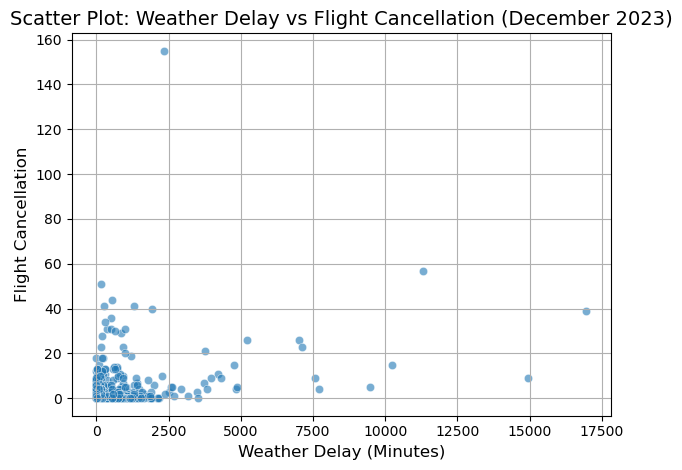

In [127]:
december_2023_data = airline_data[
    (airline_data['month'] == 12) & 
    (airline_data['year'] == 2023)
]

# Clean and filter data to avoid NaN values for correlation calculation
december_2023_data = december_2023_data[['weather_delay', 'arr_cancelled']].dropna()

# Calculate the correlation between weather delays and cancellation status
correlation = december_2023_data['weather_delay'].corr(december_2023_data['arr_cancelled'])

# Print the Pearson correlation coefficient
print(f"Pearson correlation between weather delays and flight cancellations: {correlation:.2f}")

sns.scatterplot(x='weather_delay', y='arr_cancelled', data=december_2023_data, alpha=0.6)

# Customize the plot
plt.title('Scatter Plot: Weather Delay vs Flight Cancellation (December 2023)', fontsize=14)
plt.xlabel('Weather Delay (Minutes)', fontsize=12)
plt.ylabel('Flight Cancellation', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()